# Исследование продаж видеоигр

**Цель**: Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В контексте продаж интернет-магазна компьютерных игр.

**Описание данных:** В нашем распоряжении исторические данные о продажах игр из открытых источников до 2016 года.

Данные содержат `16715` строк и `11` столбцов:

`Name` — название игры<br>
`Platform` — платформа под которую разработана игра<br>
`Year_of_Release` — год релиза<br>
`Genre` — жарн<br>
`NA_sales` — продано копий в Северной Америке<br>
`EU_sales` — продано копий в Европе <br>
`JP_sales` — пропродано копийдажи в Японии<br>
`Other_sales` — продано копий в других регионах<br>
`Critic_Score` — оценка критиков (от 0 до 100)<br>
`User_Score` — оценка пользователей (от 0 до 10)<br>
`Rating` — рейтинг ESRB («Для взрослых», «Для детей младшего возраста» или «Для подростков»)<br>

## Общая информация

In [1]:
#импортируем библиотки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#откроем датасет
data = pd.read_csv('/datasets/games.csv')

#сохраним копию сырого датасета
data_raw = data.copy()

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Заменим названия столбцов

Переведем названия всех столбцев в нижний регистр.

In [5]:
#воспользуемся функцией lower для приведения строк к нижнему регистру
data.columns = data.columns.str.lower()
#проверка
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы

#### Столбец `year_of_release`

Год релиза однозначно должен быть целочисленный.

In [6]:
data = data.astype({'year_of_release': 'Int64'})
print('Тип столбца year_of_release:', data['year_of_release'].dtypes)

Тип столбца year_of_release: Int64


#### Столбец `critic_score`

Проверим, что `critic_score` сожержит только целые значения.

In [7]:
if (data['critic_score'].astype('Int64')==data['critic_score']).dropna().all():
    print('critic_score содержит только целые значения')
else:
    print('critic_score содержит не только целые значения')

critic_score содержит только целые значения


In [8]:
data = data.astype({'critic_score': 'Int64'})
print('Тип столбца critic_score:', data['critic_score'].dtypes)

Тип столбца critic_score: Int64


#### Столбец `user_score`

Посмотрим какие значения есть в стобце.

In [9]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
1         2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

`user_score` был определен как object из-за встречающегося значения `tbd` (To Be Decided - будет решено). Данное значение не несет какого-то числового смысла, поэтому удалим его и переведем тип в целочисленный.

In [10]:
data.loc[data['user_score']=='tbd', 'user_score'] = None
data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.6      2
1        2
1.5      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [11]:
data = data.astype({'user_score': 'float'})
print('Тип столбца user_score:', data['user_score'].dtypes)

Тип столбца user_score: float64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Типы скорректированы.

### Обработаем пропуски

Пропуски есть только в части столбцов. Приведем таблицу с возможными причинами и решениями по каждому столбцу.

|Название столбца        | Пропусков | Причина              | Решение                                                 |
|------------------------|-----------|----------------------|---------------------------------------------------------|
|`name`                  | **2**     | техническая ошибка   |удалить                                                  |
|`genre`                 |  **2**    | техническая ошибка   |удалить                                                  |
|`year_of_release`       |  **269**  | техническая ошибка   |заполнить данными по другим платформам, остальное удалить|
|`critic_score`          |  **8 578**| недостаток данных    |оставить как есть                                        |
|`user_score`            |  **6 701**| недостаток данных    |оставить как есть                                        |
|`rating`                |  **6 766**| недостаток данных    |заполнить значением `unrated`                            |

#### Столбцы `genre` и `name`

Проверим, какие значения пусты.

In [13]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Всего две строки. Не указано, имя и жанр, оценки пусты. Под такое кол-во нет смысла создавать категории *unknown*, проще удалить.

In [14]:
data = data.query('name.notna()')
print('Осталось строк', len(data))

Осталось строк 16713


#### Столбец `year_of_release`

Посмотрим какие строки содержат пропуски.

In [15]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Разные игры, жанры платформы. Похоже на техническую ошибку.

Одна и та же игра может выходить под разные платформы. Найдем мультиплатформенную игру.

In [16]:
data.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70,6.6,E


Скорее всего, игра выходила на все платформы одновременно, либо же с небольшим разрывом во времени. Предположим, что это справедливо для всех игр. Заполним пропуски, исходя из записей по другим платформам.

In [17]:
def set_year_of_release(row):
    #функция для установки года релиза, исходя из данных по другим платформам
    game_name = row['name']
    #отфильтруем только непустые строки относящиеся к игре
    same_games = data.query('name == @game_name and year_of_release.notna()')
    #если таковые нашлись, то присваиваем новое значение
    if len(same_games) > 0:
        #присваеваем первое попавшееся значение года релиза
        row['year_of_release'] = data.query('name == @game_name and year_of_release.notna()').iloc[0, 2]
    return row

data[data['year_of_release'].isna()] = data[data['year_of_release'].isna()].apply(set_year_of_release, axis=1)
print('Осталось пропусков: ', len(data.loc[data['year_of_release'].isna()]))

Осталось пропусков:  146


Ещё варианты устранения пропусков:
1. Есть игры, название которых заканчивается на год (*wwe Smackdown vs. Raw 2006*). Судя по информации из гугла, такие релизят за год до указанного в названии.  Однако гарантировать, что это так - сложно. Да и игр таких не много, поэтому не будем реализовывать этот вариант.
2. Пропусков осталось не много, можно их заполнить вручную по информации из гугла. Относительно размера датасета их немного, поэтому нет смысла тратить на это время.
3. Если бы пропусков было существенное кол-во можно было бы найти сторонний датасет с такой информацией и дополнить.

Удалим оставшиеся строки с пропусками.

In [18]:
data = data[data['year_of_release'].notna()]
print('Осталось строк: ', len(data))

Осталось строк:  16567


#### Столбец `critic_score` и `user_score`

Данные столбцы содержат оценки критиков и пользователей. Заполнить средним или медианой будет искажением данных. Предполагается работа с данными столбцами как с числовыми, поэтому выделить пропуски в какую-то отдельную категорию тоже не очень удобно, лучше оставить как есть.

Пропуски могут быть связаны с недостатком данных: может быть данные не были найдены в открытых источниках, или оцениваемые игры слишком странные.

#### Столбец `rating`

Столбец категориальный, поэтому для пропусков можно ввести отдельное строковое значение, например, `unrated`.

In [19]:
data.loc[data['rating'].isna(), 'rating'] = 'unrated'
print('Осталось пропусков в столбце:', data['rating'].isna().sum())

Осталось пропусков в столбце: 0


In [20]:
print('Удалено строк:', len(data_raw) - len(data))
print('Осталось строк:', len(data))

Удалено строк: 148
Осталось строк: 16567


### Удалим дубликаты

#### Дубликаты в столбцах `name`, `platform`

Проверим столбец `platform` на дубликаты.

In [21]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Все значения уникальные.

Игра с одним и тем же именем может выйти на разных платформах, но не может выйти на одной.

In [22]:
data[data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T
4127,Sonic the Hedgehog,PS3,1991,Platform,0.0,0.48,0.00,0.00,43,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E


Удалим неявные дубликаты.

In [23]:
data = data.drop_duplicates(subset=['name', 'platform'])
print('Осталось строк:', len(data))

Осталось строк: 16563


#### Дубликаты в столбце `genre`

In [24]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Неявных дубликатов нет.

#### Дубликаты в столбце `rating`

Првоерим, значения в столбце `rating`.

Описание категорий ESRB:
- «E» («Everyone») — «Для всех»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «AO» («Adults Only 18+») — «Только для взрослых»

In [25]:
data['rating'].value_counts()

unrated    6699
E          3957
T          2928
M          1554
E10+       1411
EC            8
K-A           3
RP            2
AO            1
Name: rating, dtype: int64

Группы `E`, `T`, `M`, `E10+` сопоставимы по размеру и в них достаточно данных.

1. Группа `EC` слишком мала, припишем её к группе `Е`.
2. Группа `AO` слишком мала, припишем её к группе `M`.
3. Группа `RP` не сообщает рейтинг, припишем её к `unrated`.
4. Группы `K-A` нет в классификации, припишем её к `unrated`.

In [26]:
#создадим словарь
rating_rename_dict = {'unrated': 'unrated',
                      'E': 'E',
                      'T':'T',
                      'M':'M',
                      'E10+':'E10+',
                      'EC': 'E',
                      'K-A':'unrated',
                      'RP': 'unrated',
                      'AO': 'M',
                     }
#переименуем значения по словарю
data['rating'] = data['rating'].map(rating_rename_dict)
#проверим
data['rating'].value_counts()

unrated    6704
E          3965
T          2928
M          1555
E10+       1411
Name: rating, dtype: int64

#### Проверка на явные дубликаты

In [27]:
print('Явных дубликатов:', len(data[data.duplicated()]))

Явных дубликатов: 0


### Добавим новый столбец с суммой продаж

In [28]:
#посчитаем сумму по столбцам при помощи среза
data['total_sales'] = data.loc[:, 'na_sales':'other_sales'].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unrated,31.38


Столбец добавлен.

### Проверим данные на аномалии

In [29]:
#получим основные характеистики колличественных столбцов
data.describe().iloc[[1, 5, 3, 7], :].round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
mean,2006.49,0.26,0.15,0.08,0.05,68.99,7.13,0.54
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50,0.17
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70,82.54


- `1980`- `2016` годы.
- `0` - `82.5` млн. проданных копий игр. Максимум принадлежит популярной `Wii Sports`, не аномалия.
- `13` - `98` оценка критиков. Меньше 100, отрицательных нет
- `0` - `9.7` оценка игроков. Меньше 10, отрицательных нет

Данные в норме.

### Вывод по главе 2

1. Приведены к нижнему регистру названия столбцов.
2. Скорректированы типы данных.
3. Обработаны пропуски: 
- в столбцах `critic_score` и `user_score` пропуски оставлены как есть. Значение 'tbd' заменено на пустые значения т.к. не несет дополнительной информации;
- в столбцах `name` и `genre` удалено **2** пропуска;
- в столбце `year_of_release` было **269** пропуска. Половинна данных восстановлена по информации других платформ, остальное удалено;
- в столбце `rating пропуски` **6766** пропусков заполнено значением `unrated`;
4. Добавлен столбец суммарных продаж во всех регионах - `total_sales`.
5. Данные проверены на аномалии. Аномалий нет.

## Исследовательский анализ

### Объём продаж игр по годам

В датасете нет данных о том, как менялась динамика продаж игры. Не указано, на какой период подсчитан обьем продаж, примем, что на текущий момент. Если так, то, например, динамику игрового рынка увидеть нельзя. Но можно посчитать: сколько копий игр продано на данный момент, в разрезе года их релиза.

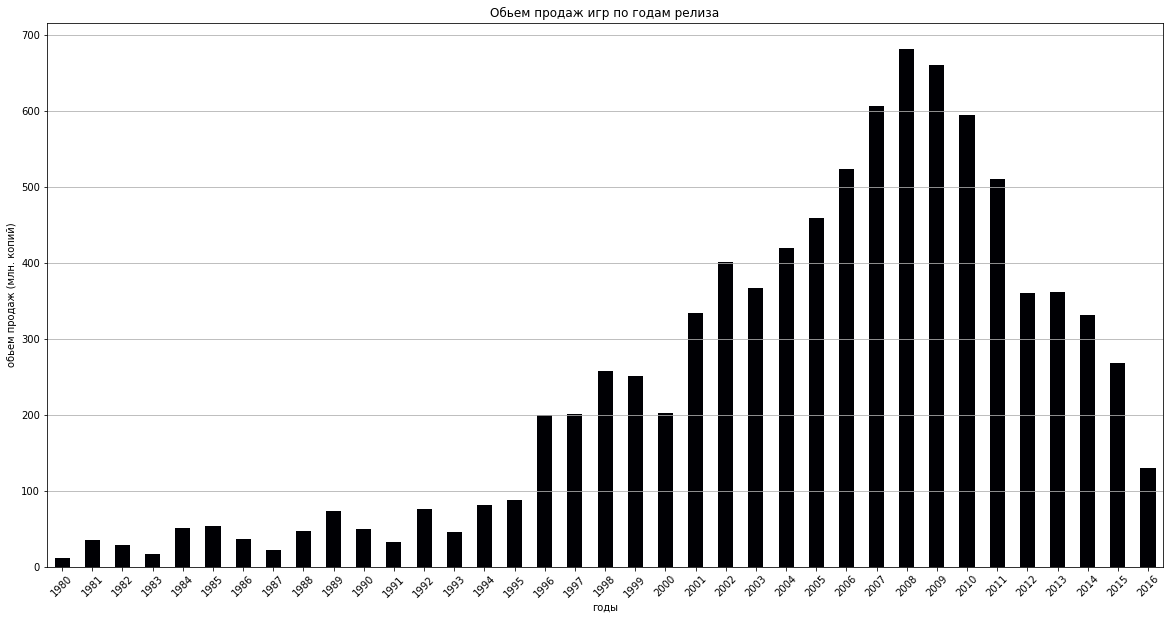

In [30]:
year_sale_plt = data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',
                                                          xlabel='годы',
                                                          ylabel='обьем продаж (млн. копий)',
                                                          colormap='inferno',
                                                          title='Обьем продаж игр по годам релиза',
                                                          rot=45,
                                                          figsize=(20, 10))
year_sale_plt.yaxis.grid()

Если судить только по данному графику, в 1996-ом был первый скачок, при котором суммарное кол-во продаж превысило 100 млн. копий. После этого наблюдается рост продаж вплоть до 2008-го года, продажи почти достигают 600 млн. копий. После - спад вплоть до 2016-го года.

На графике есть спад, но это не означает, что рынок игр увядает, вот почему:
1. Не стоит забывать, что это именно **год релиза**. То есть, больше всего копий продано по играм, **которые были выпущены** в 2008-ом году, эти игры скорее всего уже выработали свой потенциал и больше их покупать не будут. Игры, выпущенные за последние несколько лет ещё не реализовались и, скорее всего, будут проданы ещё. Если собрать данные в 2017-ом году, то возможно лидирующим будет уже 2009-ый, так как год релиза не показывает динамики продаж.
2. Это **копии**, а не доход с продаж. При уменьшении кол-во проданых копий, доход на рынке вполне может расти, в случае роста средненго чека.

### Популярность платформ по годам

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [31]:
#сгруппируем таблицу по платформе
top_platform_sales = data.groupby('platform').agg({'total_sales':['sum']})
#переименуем столбцы
top_platform_sales.columns = ['общие_продажи_по_платформе']
top_platform_sales.index.name = 'платформа'
#получим топ 10 из сортированных данных
top_platform_sales = top_platform_sales.sort_values(by='общие_продажи_по_платформе', ascending=False).head(10)
top_platform_sales

,общие_продажи_по_платформе
платформа,
PS2,1247.16
X360,965.36
PS3,934.70
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Для наглядности, построим отдельный график продаж по консолям серии Play Station.

<AxesSubplot:title={'center':'Объем продаж игр под платформы Sony по годам'}, xlabel='годы', ylabel='продажи (млн.копий)'>

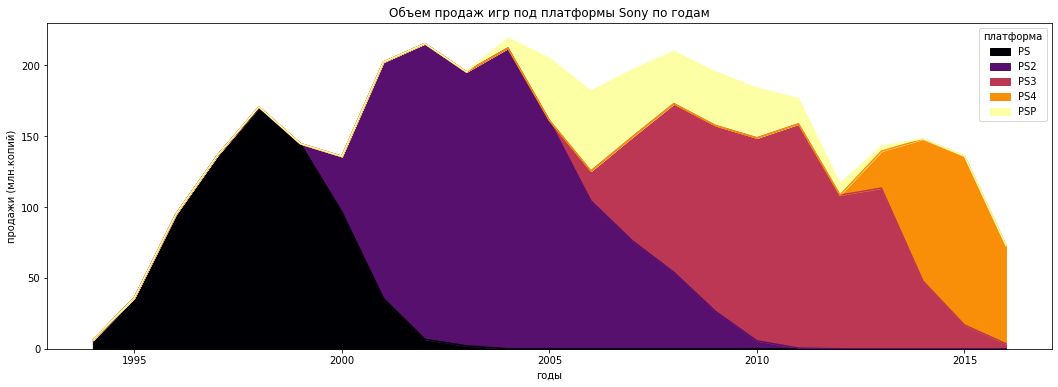

In [32]:
#создадим сводную таблицу продаж игр по плфтформам PS
platform_sales_per_year = data.query('platform in ["PS", "PS2", "PS3", "PS4", "PSP"]').pivot_table(values='total_sales',
                                                                                          index='year_of_release',
                                                                                          columns='platform',
                                                                                          aggfunc='sum')
#переименуем столбцы
platform_sales_per_year.columns.name = 'платформа'
#построим график
platform_sales_per_year.plot(kind='area',
                             stacked=True,
                             colormap='inferno',
                             figsize=(18, 6),
                             xlabel='годы',
                             ylabel='продажи (млн.копий)',
                             title='Объем продаж игр под платформы Sony по годам')

Приставки, как и полагается, сменяют друг друга. PSP - портативная, поэтому не конкурирует со стационарными консолями. Жизненный цикл примерно 10 лет.

Построим отдельный график по остальным платформам.

<AxesSubplot:title={'center':'Объем продаж игр по различным платформам по годам'}, xlabel='годы', ylabel='продажи (млн.копий)'>

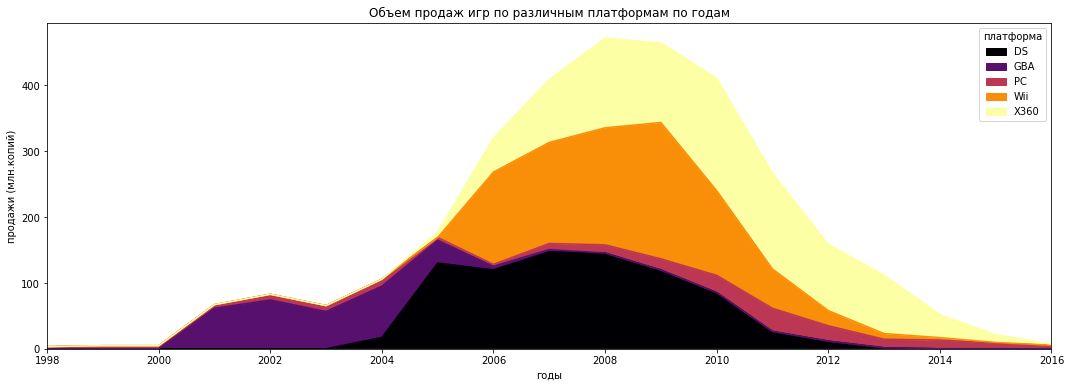

In [33]:
#создадим сводную таблицу продаж игр по всем остальным платформам
platform_sales_per_year = data.query('platform in ["X360", "Wii", "DS", "GBA", "PC"]').pivot_table(values='total_sales',
                                                                                          index='year_of_release',
                                                                                          columns='platform',
                                                                                          aggfunc='sum')
#переименуем столбцы
platform_sales_per_year.columns.name = 'платформа'
#построим график
platform_sales_per_year.plot(kind='area',
                             stacked=True,
                             colormap='inferno',
                             xlim=(1998, 2016),
                             figsize=(18, 6),
                             xlabel='годы',
                             ylabel='продажи (млн.копий)',
                             title='Объем продаж игр по различным платформам по годам')

- `Wii`, `Xbox360` и `DS`, в целом, были более популярными платформами, релизы по ним появляются с 2004-го года и уходят к 2014-ому.
- `GBA`появляется раньше - 2000-ый. Уходит к 2006-ому. Возможно, его сменяет `DS`, как похожая по формату платформа.
- `PC` всё время занимает малую долю рынка, начиная с 2006-го года эта доля растет в плоть до 2012-го.

**За какой характерный срок появляются новые и исчезают старые платформы?**

Графически жизненный цикл платформ составляет около 10 лет. Портативные консоли сменяются быстрее - 6-8 лет. ПК, в малой доле, присутсвует на рынке всегда.

### Выбор актуального периода для прогнозирования

Игровая индустрия это довольно динамичный рынок: тренды меняются в течении нескольких лет. Те технологии, игры и жанры, что были актуальны в 1996-ом году, и даже в 2006-ом, на момент 2016-го становятся, в лучшем случае, нишевыми или ностальгическими, а чаще всего уходят насовсем.

**Жизненный цикл платформы примем за 10 лет.** Анализировать продажи более чем за 10 лет - нет смысла, т.к. актуальные платформы могли смениться.

Хорошо бы понимать, какой "жизненный цикл" самих игр, то есть в течении какого срока стоит ожидать продаж, и через сколько уже не стоит рассчитывать на дополнительные продажи, текущий датасет не дает такого понимания. Будем отталкиваться от предположения, что за 5 лет игра полностью реализуется, при этом на первый год приходится более 50% продаж, после чего идет плавная убыль.

Тогда можно сказать, что самая актуальная информация о реализованных продажах находится в периоде 2012-2016 годов. С той оговоркой, что 2016-ый год не полон, как по данным, так и по объёму реализованных игр. На его колличественные характеристики опираться не стоит.

Выберем **актуальный срок для прогнозирования - 5 лет**, это половина жизненного цикла платформы и предположительное время полной реализации игр.

### Выбор потенциально прибыльных платформ

Определим топ 5 платформ, которые на момент исследования (в 2016 году) имеют наибольшую долю на рынке. Неполная величина продаж за этот год не так критична, так как распределение вряд ли принципиально поменяется.

<AxesSubplot:title={'center':'Доля продаж по платформам в 2016 г.'}>

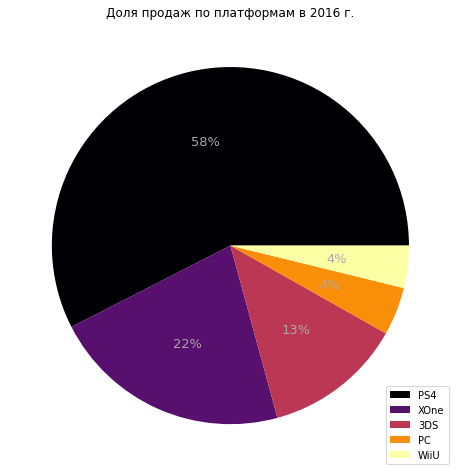

In [34]:
#рассчитаем все продажи игр за 2016ый год
platform_sales_2016 = data.query('year_of_release>=2016').pivot_table(values='total_sales',
                                                                            index='platform',
                                                                            aggfunc='sum')
#отсортируем и выберем топ 5
platform_sales_2016 = platform_sales_2016.sort_values(by='total_sales', ascending=False).head(5)

#выведем доли на 2016 год
platform_sales_2016.plot(kind='pie',
                         y='total_sales',
                         colormap='inferno',
                         ylabel='',
                         xlabel='',
                         labeldistance=None,
                         title = 'Доля продаж по платформам в 2016 г.',
                         autopct="%.0f%%",
                         textprops={'color':"darkgray", 'size':13},                                                                                                                           
                         figsize= (8, 12))

In [35]:
#выделим лист актуальных на 2016-ый год платформ
current_platform_list = list(platform_sales_2016.index)
print('Топ платформ под доли рынка на 2016ый год: ', end='')
print(*current_platform_list, sep=', ', end='.')

Топ платформ под доли рынка на 2016ый год: PS4, XOne, 3DS, PC, WiiU.

Среди актуальных платформ могут быть те, которые сейчас: в начале, середине и конце жизненного цикла. Для определения "перспективных" платформ рассчитаем прирост продаж за предпоследние 5 лет.

In [36]:
#рассчитаем все продажи игр за предпоследние 5 лет (без учета 2016)
platform_sales_last_years = data.query('year_of_release>=2012 and year_of_release<=2015').pivot_table(values='total_sales',
                                                                            columns='platform',
                                                                            index='year_of_release',
                                                                            aggfunc='sum')
#поcчистаем прирост
platform_sales_last_years_diff = platform_sales_last_years.diff(1)
#переименуем столбец
platform_sales_last_years_diff.columns.name = 'платформа'
print('Средний прирост с 2012 по 2015 среди актуальных платформ:')
platform_sales_last_years_diff.mean().sort_values(ascending=False)

Средний прирост с 2012 по 2015 среди актуальных платформ:


платформа
PS4     46.455000
XOne    20.590000
WiiU    -0.403333
PSP     -2.610000
PSV     -3.313333
PC      -4.950000
Wii     -7.266667
3DS     -7.993333
DS     -10.130000
X360   -29.586667
PS3    -30.483333
dtype: float64

- Быстрее всего увеличиваются в обьеме продаж `PS4` и `Xbox One`. 
- Быстрее всего падают `PS3` и `X360`. 
- Более-менее стабильны `WiiU`, `PSP`, `PSV`, `PC`.

Проследим как менялись продажи по актуальным платформам за **последние** 5 лет. Рассчитаем долю.

<AxesSubplot:title={'center':'Объем продаж платфор-лидеров рынка по годам'}, xlabel='годы', ylabel='объем продаж'>

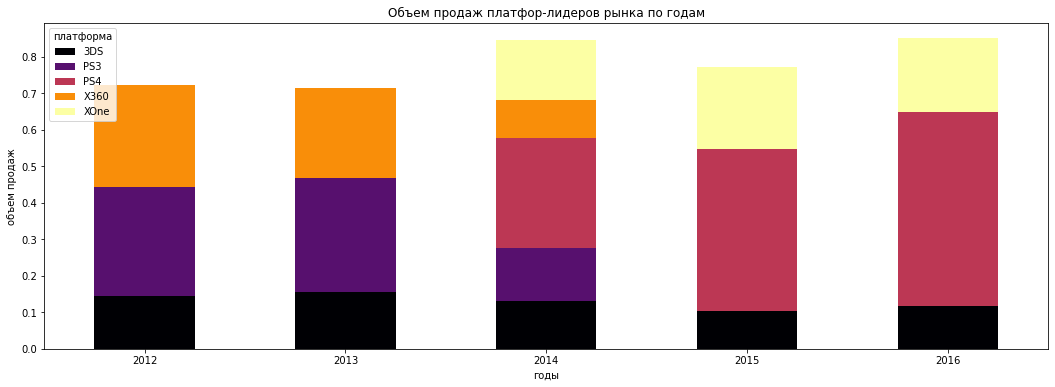

In [37]:
#рассчитаем все продажи игр за ПОСЛЕДНИЕ 5 лет
platform_sales_last_years = data.query('year_of_release>=2012 and year_of_release<=2016').pivot_table(values='total_sales',
                                                                            columns='platform',
                                                                            index='year_of_release',
                                                                            aggfunc='sum')
#заполним пропуски нулями
platform_sales_last_years = platform_sales_last_years.fillna(0)
#подсчитываем сумму и доли
platform_sales_last_years_shares = (platform_sales_last_years.T /platform_sales_last_years.T.sum()).T
#отсечем мелких игроков
platform_sales_last_years_shares_leaders = platform_sales_last_years_shares[platform_sales_last_years_shares > 0.1]
#удалим пустые столбцы (они означают, что за этот срок платформа так и не была в лидерах)
platform_sales_last_years_shares_leaders.dropna(axis='columns', how='all', inplace=True)
#переименуем имя группы столбцов
platform_sales_last_years_shares_leaders.columns.name = 'платформа'

#построим график только по актуальным платформам
platform_sales_last_years_shares_leaders.plot(kind='bar',
                             stacked=True,
                             colormap='inferno',
                             rot=0,
                             figsize=(18, 6),
                             xlabel='годы',
                             ylabel='объем продаж',
                             title='Объем продаж платфор-лидеров рынка по годам')

Теперь видно, какие платфомы были лидерами рынка в последние годы - чья доля была более 10%. Стоит отметить смену тренда в 2014-ом году.

**Какие платформы лидируют по продажам, растут или падают?**
1. Платформы в первой половине жизненного цикла, являющиеся лидерами рынка: `PS4` и `XOne` они популярны сейчас и, видимо, будут актуальны ещё несклько лет.
2. Уходящие платформы: `PS3`, `Xbox360`, закономерно - их заменили новыми версиями.
3. `3DS` почти не поменял долю за посление годы. Возможно он "нишевый". Делать ставку в рекламной компании на данную платформу можно, если нужен не большой, но стабильный результат.
4. Растут те же, что и лидируют: `PS4` и `XOne` имеют положительный прирост с 2012-го года. 
5. Падают `PS3`, `Xbox360`, как недавние лидеры, быстрее всего. 
6. `WiiU` и `PC` наиболее стабильны, но не получали большую долю проданый копий последние 5 лет.

Будем рассматривать `PS4`, `XOne`, `3DS`, `PC`, `WiiU` как **актуальные платформы**: под них продано больше всего игр 2016-го года, а также в этом списке нет "уходящих" платформ. 

### Исследуем глобальные продажи по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

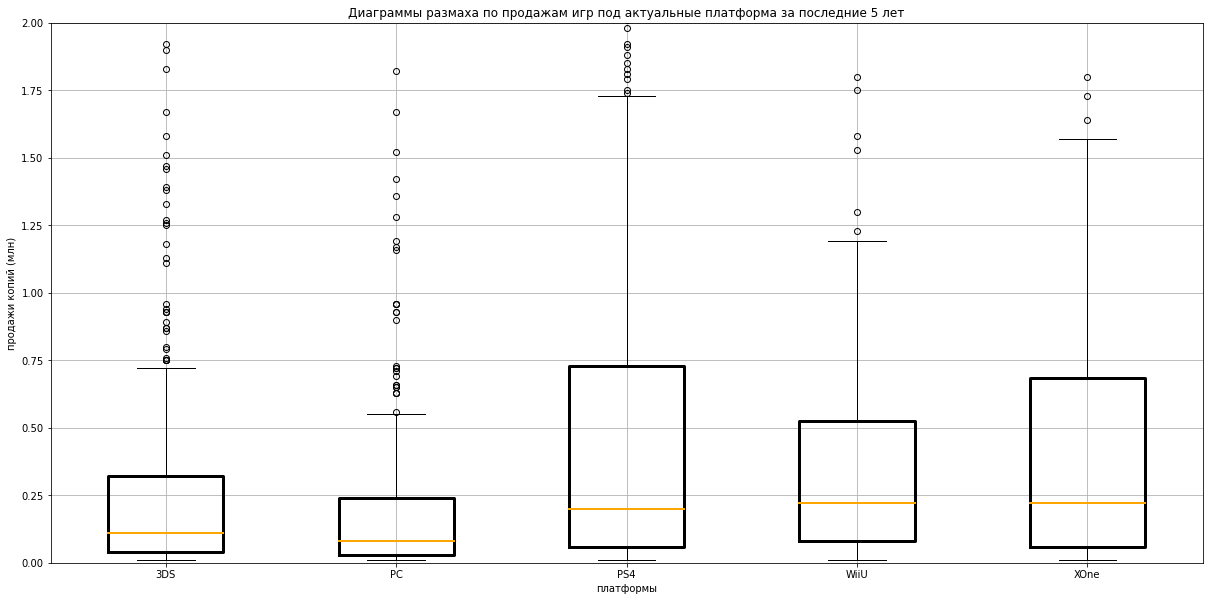

In [38]:
#выделим данные с актуальными платформами за последние 5 лет
data_current_platform_after_2012 = data.query('year_of_release>=2012 and platform in @current_platform_list')

#создадим boxplot
boxplots = data_current_platform_after_2012.boxplot(by='platform',
                                                    column='total_sales',
                                                    color='black',
                                                    boxprops=dict(linewidth=3, color='black'),
                                                    medianprops=dict(linewidth=2, color='orange'),
                                                    figsize=(20, 10))
#настроим масштаб
boxplots.set_ylim(0, 2)
#подпишем оси
boxplots.get_figure().suptitle('')
boxplots.set_title('Диаграммы размаха по продажам игр под актуальные платформа за последние 5 лет')
boxplots.set_xlabel('платформы')
boxplots.set_ylabel('продажи копий (млн)')
boxplots.linewidth=5

- Медианы лежат в пределах от `100` до `250` тыс. копий.
- Межквартильный размах и "усы" отличаются у разных платформ. Больше у новых популярных, меньше у ПК и портативной консоли. У платформ с большим кол-вом продаж, больше и размах.
- Выбросов снизу нет.
- Значения не попавшие в 1.5 межквартильных размаха  сверху это бестселлеры - такие игры были проданы в колличестве более чем 500 тыс. копий.

Сравним со средними.

In [39]:
#сгруппируем данные
data_current_platform_after_2012_gruped = data_current_platform_after_2012.groupby('platform')['total_sales'].agg(['mean', 'median', 'min', 'max'])
#подпишем столбцы
data_current_platform_after_2012_gruped.index.name = 'платформа'
data_current_platform_after_2012_gruped.columns = ['срееднее', 'медиана', 'мин.', 'макс.']
data_current_platform_after_2012_gruped.columns.name = 'продажи (млн. копий)'
#выведем результат
data_current_platform_after_2012_gruped.round(2)

продажи (млн. копий),срееднее,медиана,мин.,макс.
платформа,,,,
3DS,0.49,0.11,0.01,14.60
PC,0.25,0.08,0.01,5.14
PS4,0.80,0.20,0.01,14.63
WiiU,0.56,0.22,0.01,7.09
XOne,0.65,0.22,0.01,7.39


Медианы в разы меньше средних. Это и есть влияние бестселлеров, они "тянут" среднее значение вверх.

**Стоит ли исключить выбросы из рассмотрения?**

Ответ на данный вопрос зависит от целей исследования. В нашем случае: *Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.* При этом: *Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.*

Для этого нужно понимать, есть ли какая-то специцифика продаваемых в нашем интернет-магазине игр. Если строгого фильтра по жанрам/рейтингу/популярности игры в нашем магазине нет, то можно считать, что выборка репрезентативна. Если же известно, что наш магазин продает только определенную группу игр, наприер, только бестселлеры 18+, то стоит задуматься о том, чтобы отфильтровать выборку, и исследовать только соответвующую группу игр.

Конечно, ещё лучше было бы учитывать рекламные характеристики. Возможно бестселлеры отличаются от средних игр, может быть они привлекают пользователей чаще так как у всех на слуху, а может быть наоборот - все о них знают, у всех они есть, поэтому и рекламировать из бессмысленно.

Уточняющей информации нет, поэтому оставим бестселлеры в выборке.

### Влияние отзывов на продажи

#### Влияние отзывов на продажи по одной популярной платформе

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Оценим это по диаграммам рассеяния и коэффицентам корреляцию между отзывами и продажами.

Для анализа выберем платформу, по которой собрано достаточно данных. Лучше считать на какой платформе больше отзывов критиков и пользователей, так мы получим больше данных для рассчета коэф. корреляции.

In [40]:
#выберем данные по актуальным платформам
data_current_platform = data.query('platform in @current_platform_list')
#подсчитаем где данных больше
data_current_platform_counts = data_current_platform.groupby('platform').agg({'critic_score':'count', 'user_score': 'count'}).sort_values('user_score', ascending=False)
data_current_platform_counts.index.name = 'платформа'
data_current_platform_counts.columns = ['количество_оценок_критиков', 'количество_оценок_игроков']
data_current_platform_counts

,количество_оценок_критиков,количество_оценок_игроков
платформа,,
PC,710,765
PS4,252,257
XOne,169,182
3DS,167,172
WiiU,90,100


Больше всего по `PC`. К тому же ПК - сохраняющая актуальность платформа с большим жизненным циклом. Возможно игры под новые платформы пользователи жду сильнее, и такие ожидания как-то влияют на оценку. Для анализа возьмем **PC**.

Построим таблицу коэф. корреляции. Проверим, что между регионами нет разницы в зависимости между продажами и отзывами. Добавим суммарную оценку. Возможно она будет более точна для оценки продаж. 

In [41]:
#введем сумарную оценку
data_current_platform['total_score'] = data_current_platform['critic_score']/10 + data_current_platform['user_score']

#выберем интересующие столбцы
data_pc_by_region = data_current_platform.query('platform=="PC"')
data_pc_corr_by_region_corr_by_region = data_pc_by_region.loc[:, ['na_sales',
                                                                     'eu_sales',
                                                                     'jp_sales',
                                                                     'other_sales',
                                                                     'total_sales',
                                                                     'user_score',
                                                                     'critic_score',
                                                                     'total_score']]
#построим матрицу корреляций
data_pc_corr_by_region_corr_by_region = data_pc_corr_by_region_corr_by_region.corr().loc[:, ['critic_score', 'user_score', 'total_score']]
#переименуем таблицу
data_pc_corr_by_region_corr_by_region.columns = ['оценка_критиков', 'оценка_игроков', 'суммарная_оценка']
data_pc_corr_by_region_corr_by_region = data_pc_corr_by_region_corr_by_region.rename({'na_sales':'продажи_сев_америка',
                                                                                     'eu_sales':'продажи_европа',
                                                                                     'jp_sales':'продажи_япония',
                                                                                     'other_sales':'продажи_др_регионы',
                                                                                     'total_sales':'общие_продажи',
                                                                                     'user_score':'оценка_игроков',
                                                                                     'critic_score':'оценка_критиков',
                                                                                     'total_score':'суммарная_оценка'
                                                                                    })
#выведем
data_pc_corr_by_region_corr_by_region.round(2)


/tmp/ipykernel_48/4134420525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_current_platform['total_score'] = data_current_platform['critic_score']/10 + data_current_platform['user_score']


,оценка_критиков,оценка_игроков,суммарная_оценка
продажи_сев_америка,0.19,0.04,0.11
продажи_европа,0.22,-0.01,0.10
продажи_япония,0.10,0.07,0.09
продажи_др_регионы,0.21,-0.03,0.08
общие_продажи,0.26,0.01,0.12
оценка_игроков,0.55,1.00,0.92
оценка_критиков,1.00,0.55,0.84
суммарная_оценка,0.84,0.92,1.00


1. Связь продаж от оценки игроков отсутствует во всех регионах.
2. Связь продаж от оценки критиков слабая.
3. Разница между регионами есть. В Японии связь между продажами и оценкой критиков также нет.
4. Связь общих продаж от оценки игроков отсутствует.
5. Связь общих продаж от оценки критиков слабая.
6. Суммарная оценка не показала более тесную связь, в сравнении с оценков критиков.

С практической точки зрения, это может означать, что критики вносят какой-то небольшой вклад в продажи. Может быть игроки частично опираются на отзывы критиков, что влияет на решение о покупки некоторых игроков. С практической точки зрения, это слишком малое влияние, чтобы делать на него ставку.

Оценка критиков имеет среднюю связь с оценкой пользователей. Возможно, критики требуют большего и готовы занижать/завышать оценки за какие-то невидимые для игрока аспекты.

Построим диаграмму рассеяния. По оценкам игроков. Для наглядности отметим на графике бестселлеры другим цетом. По ПК это все игры с продажами больше 600 тыс. копий.

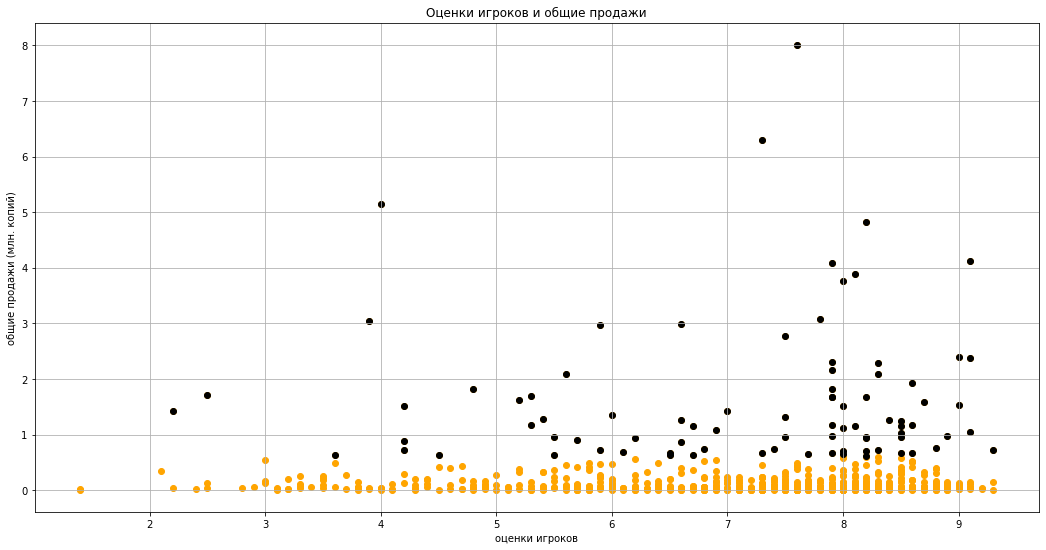

In [42]:
#выделим группу бестселлеров
data_pc_bestsellers_only = data_pc_by_region.query('total_sales > 0.6')

#зададим свойства фигуры
plt.figure(figsize=(18, 9))
plt.grid()
plt.title('Оценки игроков и общие продажи')
plt.xlabel('оценки игроков')
plt.ylabel('общие продажи (млн. копий)')
#отрисуем все точки
plt.scatter(x=data_pc_by_region['user_score'],
                                   y=data_pc_by_region['total_sales'],
                                   color='orange')
#отрисуем бестселлеры
plt.scatter(x=data_pc_bestsellers_only['user_score'],
                                   y=data_pc_bestsellers_only['total_sales'],
                                   color='black')

1. График кучнее в районе `5`-`9` баллов, пользователи чаще ставят такие оценки.
2. Игроки редко ставят оценку больше `9` и меньше `3`.
2. Бестселлеры чаще обладают высокими оценками, нежели низкими.
3. Высокие оценки ставят низкопродаваемым играм.

По графику нельзя сказать, что оценка пользователей сильно связанна с продажами. Однако легкая закономерность в группе бестселлеров прослеживается. Также важно, что игроки редко ставят низкие оценки и часто оценки выше 5.

Посмтроим аналогичную диаграмму рассеяния по оценкам критиков.

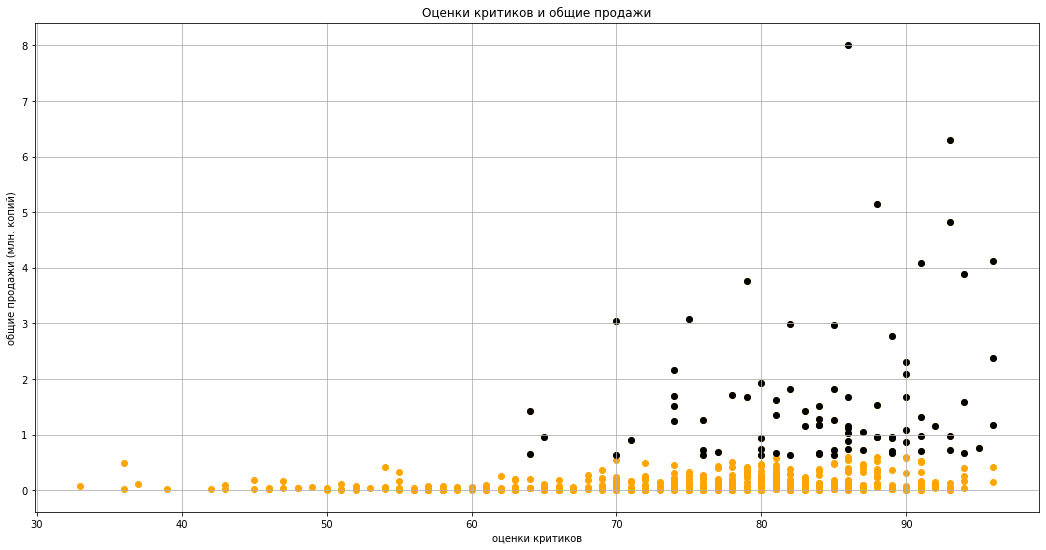

In [43]:
#зададим свойства фигуры
plt.figure(figsize=(18, 9))
plt.grid()
plt.title('Оценки критиков и общие продажи')
plt.xlabel('оценки критиков')
plt.ylabel('общие продажи (млн. копий)')
#отрисуем все точки
plt.scatter(x=data_pc_by_region.dropna()['critic_score'],
                                   y=data_pc_by_region.dropna()['total_sales'],
                                   color='orange')
#отрисуем бестселлеры
plt.scatter(x=data_pc_bestsellers_only.dropna()['critic_score'],
                                   y=data_pc_bestsellers_only.dropna()['total_sales'],
                                   color='black')


1. График кучнее в районе `50`-`90` баллов, критики чаще ставят такие оценки.
2. Игроки редко ставят оценку больше `95` и меньше `40`.
3. Бестселлеры всегда получают более `50` баллов.
4. Высокие оценки критики также ставят низкопродаваемым играм.
5. В целом график кучнее, меньше высокопродаваемых игр среди низких оценок и больше среди высоких.

По графику заметно, что критики выше оцениват более продаваемые игры. Бестселлеры не получают оценки ниже средней - `50`. Нельзя доказать, что оценка критиков влияет на продажу, может быть такие оценки выставляются уже после того, как становится понятно, что игра будет бестселлером. Однако и по коэф. корреляции видно, оценка критиков сильнее связана с уровнем продаж, нежели оценка игроков. Хоть и сама эта связь довольно слабая.

#### Влияние отзывов на продажи по одной всем платформам

Соотнесем выводы с продажами игр на других платформах. Построим матрицу корреляций по всем платформам и оценкам критиков/игроков

In [44]:
#создадим датафрейм с матрицей корреляций по интересующим признакам (оценки-продажи)
data_current_platform_corr = pd.DataFrame(data_current_platform[['platform', 'total_sales', 'critic_score', 'user_score']].groupby('platform').agg('corr')[['critic_score', 'user_score']])
#переименуем столбцы, строки и индексы
data_current_platform_corr = data_current_platform_corr.rename({'total_sales':'общие_продажи'})
data_current_platform_corr.columns = ['оценка_критиков', 'оценка_игроков']
data_current_platform_corr.index.names = ['платформа', 'общие_продажи']

#отфильтруем только интересующие значения из матрицы корреляции
data_current_platform_corr = data_current_platform_corr[data_current_platform_corr.index.isin(['общие_продажи'], level=1)].round(2)
#"распрямим" индексы
data_current_platform_corr.index = [' '.join(i) for i in data_current_platform_corr.index]
data_current_platform_corr.index.name = 'коэф_корреляции'

#выведем
data_current_platform_corr

,оценка_критиков,оценка_игроков
коэф_корреляции,,
3DS общие_продажи,0.35,0.22
PC общие_продажи,0.26,0.01
PS4 общие_продажи,0.41,-0.03
WiiU общие_продажи,0.35,0.40
XOne общие_продажи,0.42,-0.07


Построим хитмап для наглядности.

<AxesSubplot:ylabel='коэф_корреляции'>

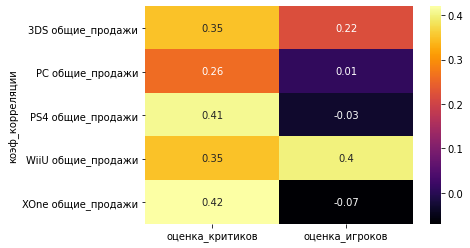

In [45]:
sns.heatmap(data_current_platform_corr, annot=True, cmap='inferno')

1. Все оценки критиков на платформах кроме ПК показывают среднюю связь с продажами.
2. `WiiU` единственная платформа на которой оценка игроков средне связанна с продажами. 
3. `XOne` имеет более тесную связь оценок критиков и продаж среди всех платформ, при этом самую меньшу связь продаж с оценками игроков.

Возможно более тесная связь оценок с продажами свойственна самым новым платформам. Возможно такая связь присуща всем консолям. Однако, пока по этим платформам слишком мало данных. По вомзожности, лучше перепроверить эти выводы, в случае, поступления новых данных.

### Исследуем распределение игр по жанрам

#### Распределение игр по жанрам в продажах

Как и ранее, рассмотрим жанры за исследуемый период - 5 лет на актуальных платформах. Для начала оценим кол-во данных в группах и сумму продаж.

In [46]:
#сгрупируем данные
data_sum_sales_by_genre_current_platform_after_2012 = data_current_platform_after_2012.groupby('genre')['total_sales'].agg({'count', 'sum'})
#переименуем колонки и столбцы
data_sum_sales_by_genre_current_platform_after_2012.columns = ['сумма', 'колличество']
data_sum_sales_by_genre_current_platform_after_2012.index.name = 'жанр'
#выведем отсортированных список
data_sum_sales_by_genre_current_platform_after_2012.sort_values(by='колличество', ascending=False)

,сумма,колличество
жанр,,
Action,212.36,520
Role-Playing,135.38,178
Shooter,169.31,133
Sports,93.00,121
Misc,38.26,107
Adventure,14.36,95
Racing,31.23,62
Platform,49.40,56
Simulation,31.27,54


1. Заметно больше игр издано в жанре `Action`. Меньше всего в жанре `Puzzle`.
2. Общая сумма продаж больше в некоторых менее представленных жарнах. Это обзначет, что в среднем на игру этот жанр будет более продаваемый.

Рассчитаем среднее, медианы значений продаж по жарну.

<AxesSubplot:title={'center':'Обьем продаж (млн. копий)'}, ylabel='жанры'>

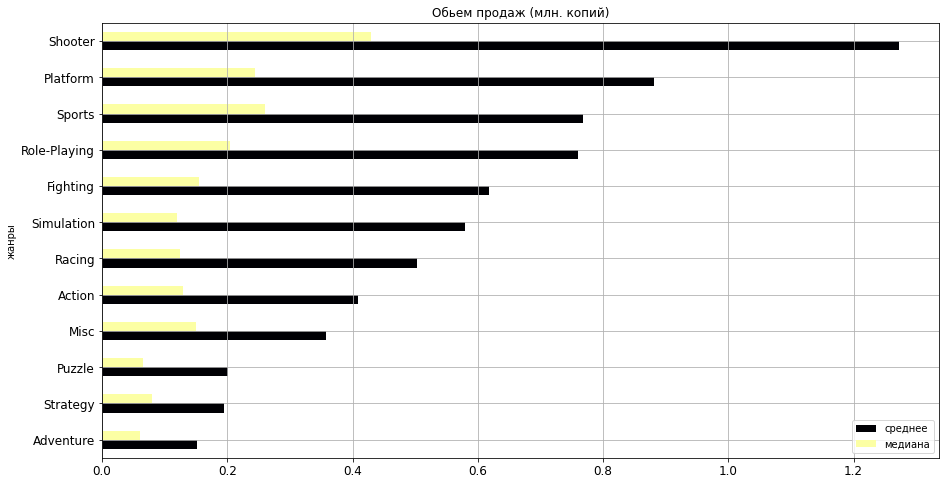

In [47]:
#получим общие продажи по жанрам (среднее)
data_sales_by_genre_current_platform_after_2012 = data_current_platform_after_2012.groupby('genre')['total_sales'].agg({'mean', 'median'})
data_sales_by_genre_current_platform_after_2012.columns = ['среднее', 'медиана']

#отсортируем и отрисуем столбчатую диаграмму (среднее)
data_sales_by_genre_current_platform_after_2012.sort_values(by='среднее').plot(kind='barh',
                                                                            xlabel='жанры',
                                                                            title='Обьем продаж (млн. копий)',
                                                                            colormap='inferno',
                                                                            grid=True,
                                                                            fontsize=12,
                                                                            legend=True,
                                                                            figsize=(15, 8))


1. Самые большие по средним продажам жанр - *шутеры*.
2. Верхняя половина списка: *платформеры, спортивные, RPG, файтинги и разное*. 
3. Наименнее прибыльные по средним продажам жанры: *экнш, гонки, симуляторы, стратегии, пазлы и приключения*.
4. Медианы не всегда пропорциональны средним. Возможно, в таких жанрах как `Sport` и `Misc` меньше бестселлеров.

#### Анализ самых продаваемых жанров

Рассмотрим только те жанры, которые попали в топ в верхние половины обоих списков. Это будет означать, что жанр и популярен и в нем высокие средние продажи на игру. Такие жанры: *РПГ, шутеры и спорт*.

In [48]:
#выделим топ жанров по средним и общим продажам
top_profit_genres_list = ['Role-Playing', 'Shooter', 'Sports']

Посмотрим как они представлены на рынке актуальных платформ по годам.

<AxesSubplot:title={'center':'Топ жанры с 2012 по 2016 г.'}, ylabel='доля продаж'>

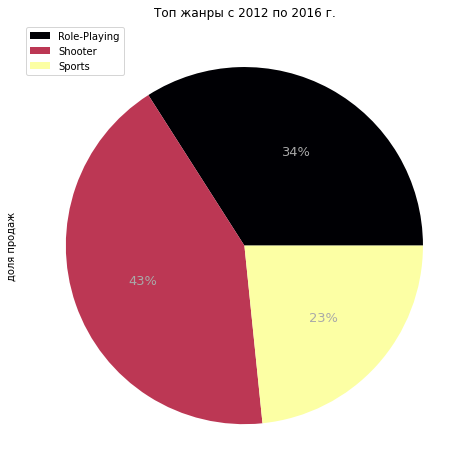

In [49]:
data_current_platform_after_2012.query('genre in @top_profit_genres_list').groupby('genre')['total_sales'].agg('sum').plot(kind='pie',
                                                                                                                           y='total_sales',
                                                                                                                           colormap='inferno',
                                                                                                                           title='Топ жанры с 2012 по 2016 г.',
                                                                                                                           ylabel='доля продаж',
                                                                                                                           autopct="%.0f%%",
                                                                                                                           textprops={'color':"darkgray", 'size':13},
                                                                                                                           legend=True,
                                                                                                                           labeldistance=None,
                                                                                                                           figsize=(8, 12))

Шутеры покаывают большую долю рынка по продажам игр за последние 5 лет.

Посмотрим тренды продаж по выбранным жанрам. 2016-ый год не полон, поэтому не включим его в рассмотрение.

<AxesSubplot:title={'center':'Продажи по жанрам с 2012 по 2015 г.'}, xlabel='годы', ylabel='продажи (млн.копий)'>

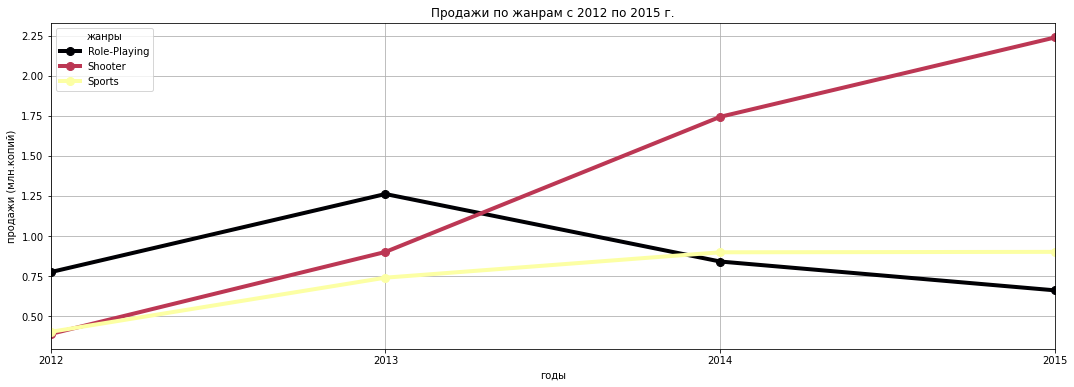

In [50]:
#получим сводную для построения графика
data_current_platform_after_2012_pivot = data_current_platform_after_2012.query('genre in @top_profit_genres_list').pivot_table(index='year_of_release', values='total_sales', columns='genre')
#переименуем имя столбца
data_current_platform_after_2012_pivot.columns.name = 'жанры'
#построим график
data_current_platform_after_2012_pivot.plot(style='o-',
                                            colormap='inferno',
                                            figsize=(18, 6),
                                            xlim=(2012, 2015),
                                            xticks=(2012, 2013, 2014, 2015),
                                            xlabel='годы',
                                            ylabel='продажи (млн.копий)',
                                            title='Продажи по жанрам с 2012 по 2015 г.',
                                            linewidth=4,
                                            markersize=8,
                                            grid=True)


Локальный тренд предпоследних 4 лет показывает, *шутеры и спортивные игры* набирают популярность, а *РПГ* теряют.

### Выводы по главе 3

1. **Объём продаж** по годам рос до 2008-го года. На момент среза это самый плодовитый по продажам игр год, с тех пор на графике наблюдается снижение. Однако это падение нельзя проинтерпретировать как падение рынка, хотя бы потому, что выпущенные недавно ещё не реализованы. А также потому, что мы располагаем только данными о проданных копиях - денег на рынке могло стать больше засчет повышения среднего чека.
2. **Популярность платформ** по годам меняется. Жизненный цикл стационарных консолей - порядка 10 лет. Меньше у портативных - около 7. Больше 10 у ПК.
3. **Актуальный срок** для анализа выбран - 5 лет. Это половина жизненного цикла платформы, а также предположительное время полной реализации одной игры на рынке.
4. **Потенциально прибыльные платформы.** Акутальные на последние 5 лет платформы можно подразделить на:
 - Трендовые `PS4` и `Xbox One`. На них точно стоит сделать ставку в ближайшем году.
 - Стабильные `PC` и `3DS`. На них можно рассчитывать, если нужен стабильно, но не большой результат.
 - Уходящие `PS3` и `Xbox 360`. Эти платформы заменены новыми версиями и теряют прирост, их рассматривать не стоит.
5. **Глобальные продажи по актуальным платформам.** Медианы по количеству продаж лежат в районе `100`-`250` тыс. копий в зависимости от платформы. Также выделяется группа бестселлеров - игры от `600` тыс. проданных копий и более. В контексте рекламной компании эту информацию можно использовать, как для выбора самых продаваемых игр, так и для рекламы "среднячков", в зависимости от целей рекламной кампании и специфики, продаваемых магазином игр.
6. **Влияние отзывов на продажи.** Отзывы игроков, как оказалось, слабо связаны с продажами, на них ориентироваться не стоит. При этом отзывы критиков показывают, как минимум, слабую связь с продажми. По некоторым новым платформам эта связь ещё теснее. Нельзя сказать, что будет являтся причиной, а что следствием: критики ли оценивают выше высокопродаваемые игры, или же продажи растут от их оценок. На практике - если у магазина есть какие-то простые механизмы влияния на мнения критиков, то стоит их задействовать, однако не стоит ожидать сильного эффекта.
7. **Распределение игр по жанрам.** Жанры, на которые стоит обратить внимание это *шутеры, спортивные и РПГ*. Эти жанры имеют и большу́ю долю рынка и высокий показать среднего количества проданных копий по игре. Особенно стоит обратить внимание на *шутеры*,  за предпоследние 4 года они росли быстрее всего. *Спортивные* тоже росли но не так быстро, а *РПГ* локально теряет позиции.

## Портрет пользователей по регионам (NA, EU, JP)

### Проанализируем популярные платформы по регионам: Северная Америка, Европа и Япония

Представим топ 5 платформ по каждому региону и их доли на рынке.

In [51]:
#выделим нужные столбцы
data_by_region_after_2012 = data.query('year_of_release >= 2012')[['platform','genre', 'na_sales', 'eu_sales', 'jp_sales', 'rating']]

<AxesSubplot:title={'center':'Объем продаж игр под топ 5 платформ-лидеров регина'}, xlabel='регионы', ylabel='продажи (млн. копий)'>

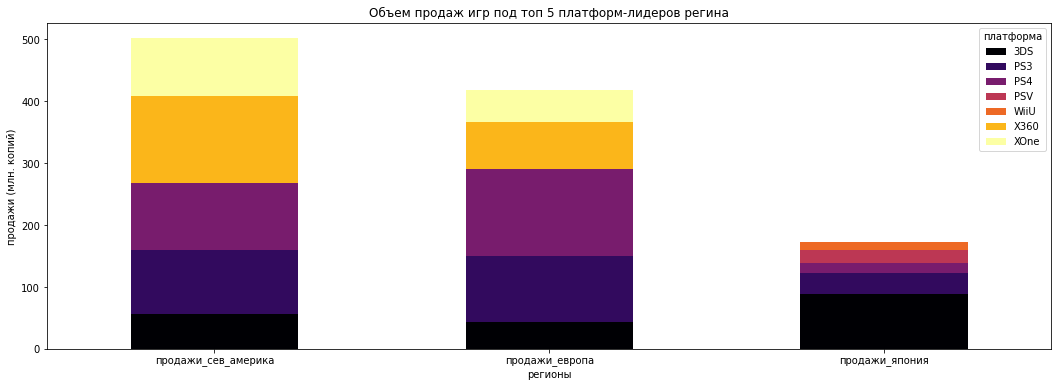

In [52]:
#рассчитаем продажи по трем регионам
#Северная америка
top_5_platform_sales_by_na = data_by_region_after_2012.pivot_table(values='na_sales',
                                                                   index='platform',
                                                                   aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
#Европа
top_5_platform_sales_by_eu = data_by_region_after_2012.pivot_table(values='eu_sales',
                                                                   index='platform',
                                                                   aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
#Япония
top_5_platform_sales_by_jp = data_by_region_after_2012.pivot_table(values='jp_sales',
                                                                   index='platform',
                                                                   aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
#объеденим в один датафрейм
top_5_platform_sales_by_regions = top_5_platform_sales_by_na.join(top_5_platform_sales_by_eu, how='outer').join(top_5_platform_sales_by_jp, how='outer')
#переименуем столбцы
top_5_platform_sales_by_regions.columns = ['продажи_сев_америка' , 'продажи_европа', 'продажи_япония']
top_5_platform_sales_by_regions.index.name = 'платформа'

#построим барплот
top_5_platform_sales_by_regions.T.plot(kind='bar',
                             stacked=True,
                             colormap='inferno',
                             figsize=(18, 6),
                             title='Объем продаж игр под топ 5 платформ-лидеров регина',
                             xlabel='регионы',
                             rot=0,
                             ylabel='продажи (млн. копий)')

1. Рынок Северной Америки самый большой. Японии - самый маленький.
2. Рынки Европы и Северной Америки идентичны по топ 5 платформам-лидерам: `PS4`, `PS3`, `X360`, `X360`, `3DS`. 
3. В Японии, нет `X360` и `XOne`, зато есть `PSV` и `WiiU`. Видимо, это связанно с региональной близостью компаний-производителей Sony и Nintendo.

Оценим разницу в относительных долях рынка.

<AxesSubplot:xlabel='платформы'>

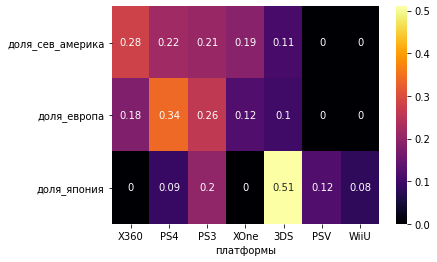

In [53]:
#рассчитаем относительные доли рынка
top_5_platform_sales_by_regions_share = top_5_platform_sales_by_regions.copy()

for r in top_5_platform_sales_by_regions_share:
    top_5_platform_sales_by_regions_share[r]/=top_5_platform_sales_by_regions_share[r].sum()
#переименуем индексы
top_5_platform_sales_by_regions_share.index.name = 'платформы'
top_5_platform_sales_by_regions_share.columns = ['доля_сев_америка', 'доля_европа', 'доля_япония']

#заполним пропуски 0 и отстортируем#
top_5_platform_sales_by_regions_share = top_5_platform_sales_by_regions_share.fillna(0).sort_values(by='доля_сев_америка', ascending=False)
#построим хитмап
sns.heatmap(top_5_platform_sales_by_regions_share.round(2).T, annot=True, cmap='inferno')

1. В относительных долях наглядней прослеживается преобладание платформы `PS4` в Европе, отностителньно Северной Америки. И наоборот преобладание `X360` в Северной Америки относительно Европы.
2. В Японии более половины доли из пятерки лучших платформ занимает `3DS`, эта доля в 5 раз выше чем на западе.
3. `PS3` имеет сопоставимую относительную долю рынка во всех регионах - 1/5 и более.

### Проанализируем жанры по регионам

Построим pie-диаграммы с долями рынка по жанрам в регионах.

array([<AxesSubplot:ylabel='сев_америка'>, <AxesSubplot:ylabel='европа'>,
       <AxesSubplot:ylabel='япония'>], dtype=object)

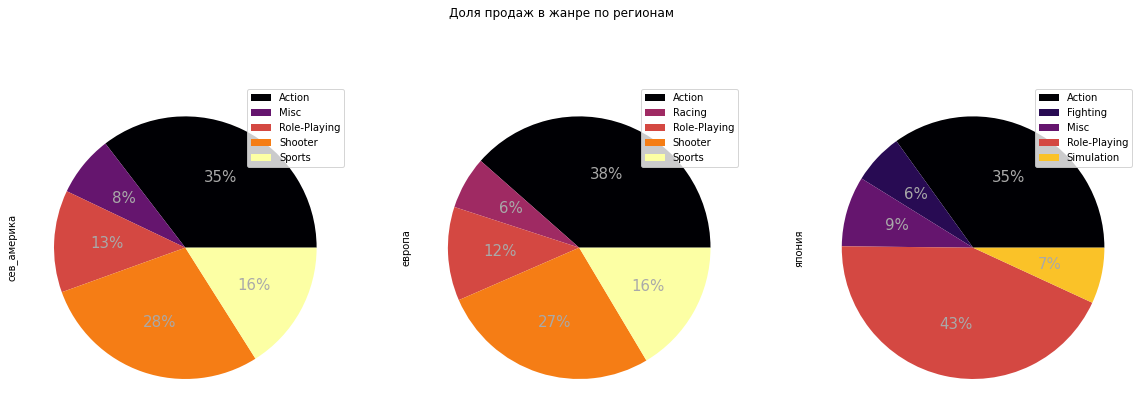

In [54]:
#рассчитаем продажи по трем регионам в разрезе жанов
#Северная америка
top_5_geners_sales_by_na = data_by_region_after_2012.pivot_table(values='na_sales',
                                                                 index='genre',
                                                                 aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
#Европа
top_5_geners_sales_by_eu = data_by_region_after_2012.pivot_table(values='eu_sales',
                                                                 index='genre',
                                                                 aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
#Япония
top_5_geners_sales_by_jp = data_by_region_after_2012.pivot_table(values='jp_sales',
                                                                 index='genre',
                                                                 aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
#объеденим в один датафрейм
top_5_geners_sales_by_regions = top_5_geners_sales_by_na.join(top_5_geners_sales_by_eu, how='outer').join(top_5_geners_sales_by_jp, how='outer')
#переименуем столбцы
top_5_geners_sales_by_regions.columns = ['сев_америка' , 'европа', 'япония']
#построим pie
top_5_geners_sales_by_regions.plot(kind='pie', 
                                   subplots=True,
                                   colormap='inferno',
                                   labeldistance=None,
                                   title='Доля продаж в жанре по регионам',
                                   autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '',
                                   textprops={'color':"darkgray", 'size':15},
                                   figsize=(20, 7)
                                  )

1. *Экшн* везде занимает больше трети рынка.
2. *Шутеры, спортивыне и РПГ* входят в пятерку в Северной Америке и Европе и занимают схожие доли рынка. В сумме занимают больше половины рынка.
3. *РПГ* на рынке Японии занимают самую большую долю - `43%`.
4. Меньшие жанры в пятерке на каждом рынке свои. Сев. Америка - `Misc`, Европа - `Racing`. Япония - `Simulation`, `Misc`, `Fighting`.

### Влияние рейтинга ESRB на продажи по регионам

array([<AxesSubplot:ylabel='сев_америка'>, <AxesSubplot:ylabel='европа'>,
       <AxesSubplot:ylabel='япония'>], dtype=object)

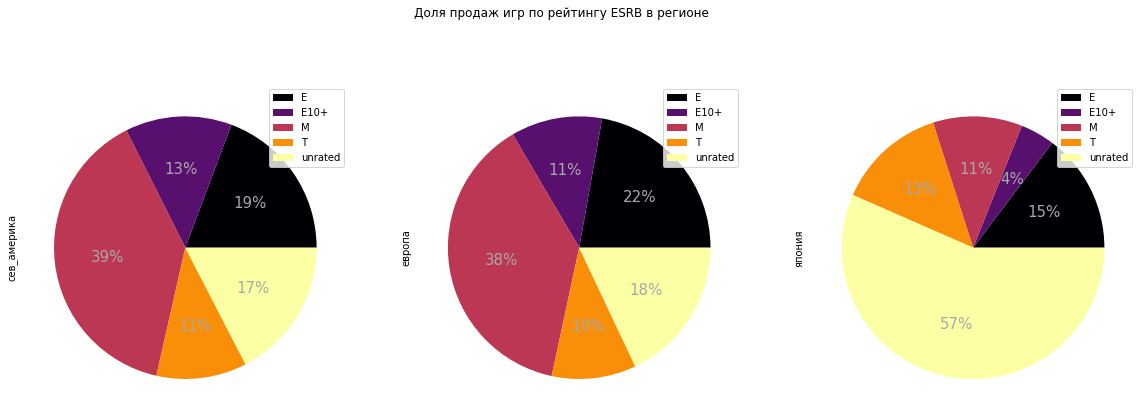

In [55]:
#рассчитаем продажи по трем регионам в рейтинге ESRB
#Северная америка
rating_sales_by_na = data_by_region_after_2012.pivot_table(values='na_sales',
                                                           index='rating',
                                                           aggfunc='sum').sort_values(by='na_sales', ascending=False)
#Европа
rating_sales_by_eu = data_by_region_after_2012.pivot_table(values='eu_sales',
                                                           index='rating',
                                                           aggfunc='sum').sort_values(by='eu_sales', ascending=False)
#Япония
rating_sales_by_jp = data_by_region_after_2012.pivot_table(values='jp_sales',
                                                           index='rating',
                                                           aggfunc='sum').sort_values(by='jp_sales', ascending=False)
#объеденим в один датафрейм
rating_sales_by_regions = rating_sales_by_na.join(rating_sales_by_eu, how='outer').join(rating_sales_by_jp, how='outer')
#переименуем столбцы
rating_sales_by_regions.columns = ['сев_америка' , 'европа', 'япония']
#построим pie
rating_sales_by_regions.plot(kind='pie', 
                                   subplots=True,
                                   colormap='inferno',
                                   labeldistance=None,
                                   title='Доля продаж игр по рейтингу ESRB в регионе',
                                   autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '',
                                   textprops={'color':"darkgray", 'size':15},
                                   figsize=(20, 7)
                                  )

1. Продажи по рейтингу вновь схожи по регионам Сев. Америка и Европа.
2. В Японии бóльшая доля проданных игр не была отранжирована по ESRB. Посроим аналогичные диаграммы, исключив категорию `unrated`.

array([<AxesSubplot:ylabel='сев_америка'>, <AxesSubplot:ylabel='европа'>,
       <AxesSubplot:ylabel='япония'>], dtype=object)

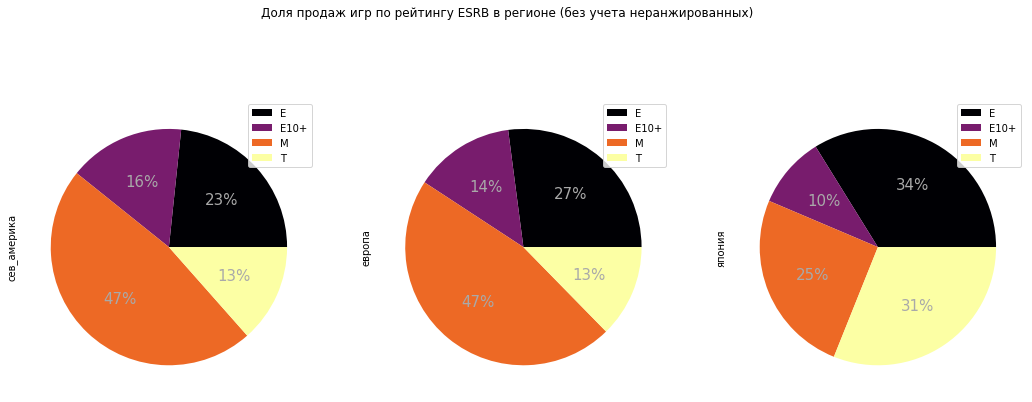

In [56]:
#построим pie, исключив "unrated"
rating_sales_by_regions.query('rating != "unrated"').plot(kind='pie', 
                                                           subplots=True,
                                                           colormap='inferno',
                                                           labeldistance=None,
                                                           title='Доля продаж игр по рейтингу ESRB в регионе (без учета неранжированных)',
                                                           autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '',
                                                           textprops={'color':"darkgray", 'size':15},
                                                           figsize=(18, 7))

1. Европа и Сев. Америка по-прежнему схожи, доли рынка распределены практически аналогично
2. В отличии от распределения продаж по платформам и жанрам, по рейтингу ESRB Япония больше схожа с западными регонами. Если брать в рассчет только отранжированные игры.
3. Заметное отличие Японии от западного рынка в соотношении игр категории `M` - «Для взрослых» и `Т` - «Подросткам». В Японии эти категории занимают треть и четверть рынка. Тогда как в Европе и Сев. Америке почти половина рынка принаджелит категории `M`.

### Выводы по главе 4

Портеты игорков Северной Америки и Европы схожы во всех анализируемых разрезах. И отличаются от японского по преобладающим платформам и жанрам.
1. Игрок **Северной америки**:
 - Использует `X360` и `PS4` или их предыдущие версии. Отдает предпочтения консолям Microsoft.
 - Играет в `Action` и `Shooter`.
 - Предпочитает игры рейтинга *«Mature»*. И *«Everyone»* в меньшей степени.
2. Игрок **Европы**:
 - Использует `PS4` и `X360` или их предыдущие версии. Отдает предпочтения консолям Sony. 
 - Играет в 
 - Предпочитает игры рейтинга *«Mature»*. И *«Everyone»* в меньшей степени.
3. Игрок **Японии**:
 - Использует преимущественно `3DS`, а также консоли фирмы Sony.
 - Играет в `Action` и `Role-Plaing`.
 - Предпочитает игры рейтинга *«Everyone», «Teen» и «Mature»* в равной степени.

## Общие выводы

Основной целью исследования было: выявить определяющие успешность игры закономерности для планирования рекламных кампании интернет-магазина компьютерных игр.

**Актуальный срок** для анализа выбран - 5 лет. Это половина жизненного цикла платформы, а также предположительное время полной реализации одной игры на рынке. 

**Объём продаж** за весь исторический период меняется. На момент среза продано больше всего игр, выпущенных в 2008-ом году. Игры выпущенные позже, проданы меньшим объемом копий. Это не обязательно говорит о падении рынка. Игры, выпущенные позже могут быть реализованы в будующем. Также спад может быть связан с изменением структуры потребления - изменения характера копирования игр или среднего чека.

**Популярность платформ** по годам меняется. Жизненный цикл стационарных консолей - порядка 10 лет. Меньше у портативных - около 7. Больше 10 у ПК.
 - **Сделать ставку в ближайшем году стоит** на `PS4` и `Xbox One`. Они сейчас в тренде.
 - **Если нужен стабильный результат** можно присмотрется к платформам `PC` и `3DS`. Они долго время держат свою, хоть и не большую, долю рынка.
 - **Не стоит рассматривать** `PS3` и `Xbox 360`. Эти платформы были актуальны и в последние 5 лет, но теперь заменены новыми версиями и теряют сильно теряют прирост продаж.

**В глобальные продажах по актуальным платформам** заметны две группы игр - бестселлеры и "среднячки". В контексте рекламной компании эту информацию можно использовать, как для выбора самых продаваемых игр, так и для рекламы "среднячков". Для этого нужно понимать, есть ли какая-то специцифика продаваемых в нашем интернет-магазине игр.

**Отзывы игроков**, как оказалось, слабо связаны с продажами, на них ориентироваться не стоит.

**Отзывы критиков** показывают, как минимум, слабую и среднюю связь с продажами. Нельзя сказать: критики ли оценивают выше высокопродаваемые игры, или же продажи растут от их оценок. Если первое, то тогда стоит делать ставку на игры, которые уже высоко оценили критики. Если второе, то стоит подумать, есть ли у магазина механизмы влияния на мнения критиков. Если есть, то стоит их задействовать.

**Распределение игр по жанрам.** Жанры, на которые стоит обратить внимание это `Shooter`, `Sport` и `Role-Playing`. Эти жанры имеют и большу́ю долю рынка и высокий показать среднего количества проданных копий по игре. Особенно стоит обратить внимание на *шутеры*,  за предпоследние 4 года они росли быстрее всего.

**Портеты игорков** Северной Америки и Европы схожы во всех анализируемых разрезах. И отличаются от японского по преобладающим платформам и жанрам.

**Игроки Северной америки**:
 - Используют `X360` и `PS4` или их предыдущие версии. Отдает предпочтения консолям Microsoft.
 - Играют в `Action` и `Shooter`.
 - Предпочитают игры рейтинга *«Mature»*. И *«Everyone»* в меньшей степени.

**Игроки Европы**:
 - Используют `PS4` и `X360` или их предыдущие версии. Отдает предпочтения консолям Sony. 
 - Играют в `Action` и `Shooter`.
 - Предпочитают игры рейтинга *«Mature»*. И *«Everyone»* в меньшей степени.

**Игроки Японии**:
 - Используют преимущественно `3DS`, а также консоли фирмы Sony.
 - Играют в `Action` и `Role-Playing`.
 - Предпочитают игры рейтинга *«Everyone», «Teen» и «Mature»* в равной степени.

**Особенности данных:** датасет небольшой, важные столбцы содержат достаточно данных. Но есть ряд недостатков, устранние которых могло бы улучшить качество анализа:
- Неполная информация по оценкам критиков, игроков и рейтинга ESRB. Недостаток данных за 2016 год.
- Большая часть данных не анализируется из-за неактуальности. На выбранный актуальный период - 5 лет не всегда приходится достаточно данных, особенно при разбивки по группам популярных платформ, жанров и т.д.
- Данные содержат информацио *годе релиза*. Это не позволяет увидеть сколько копий игры было продано после релиза, например, за последние года.
- В данных нет информации о стоимости игр, это не позволяет понять как изменятся денежная масса рынка. Может быть было бы полезно знать, какие игры, жанры и платформы имеют больший средний чек.

**Основной вывод** заключается в том, что выстраивание рекламной компании на следующий год должно во многом зависеть от структуры продаж самого магазина. Перечисленные выводы по глобальному рынку помогают понять некие тренды по регионам, жанрам, рейтингу и платформам, на которые следует ориентироваться, сопоставляя с собственной спецификой.